# Overfitting in TensorFlow
Neural networks are amazing, but if you pick a random question and try to answer it using a neural network, there is a good chance the results will be disappointing.  Neural networks, especially those with many neurons and layers, are prone to overfitting.

We will not get to it in this quarter of Math 10, but I want to point out the scikit-learn function `train_test_split` that can be very useful for producing test sets which can be used to help identify overfitting:  [documentation for train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

## Code from last week and before

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # suppress most warnings in TensorFlow
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
df = pd.read_csv("../data/spotify_dataset.csv", na_values = " ")
df["Streams"] = pd.to_numeric(df["Streams"].map(lambda s: s.replace(",","")))
df = df[df.notna().all(axis=1)].copy()
numeric_cols = [c for c in df.columns if is_numeric_dtype(df[c])]

df["Genre"] = df["Genre"].map(eval)

scaler = StandardScaler()
scaler.fit(df[numeric_cols])

df[numeric_cols] = scaler.transform(df[numeric_cols])

def count_songs(g):
    return len(df[df["Genre"].map(lambda g_list: g in g_list)])

all_genres = sorted(list(set(df["Genre"].sum())))

In [4]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

model = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape = (28,28)),
        keras.layers.Flatten(),
        keras.layers.Dense(16, activation="sigmoid"),
        keras.layers.Dense(16, activation="sigmoid"),
        keras.layers.Dense(10,activation="softmax")
    ]
)

model.compile(
    loss="sparse_categorical_crossentropy", 
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"],
)

history = model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.0223 - accuracy: 0.4817
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 1.4677 - accuracy: 0.6921
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0824 - accuracy: 0.7604
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8997 - accuracy: 0.7847
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7956 - accuracy: 0.8008


## Evaluating the network

The next result should be very close to the loss and accuracy from above, because it is computed using the same set `X_train`.

In [5]:
model.evaluate(X_train, y_train)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.7606 - accuracy: 0.7904


[0.7605946063995361, 0.7904333472251892]

More interesting is the next result, because it is evaluated on a test set, which was not used when we trained the neural network.  The fact that the following numbers are similar to the above numbers is a good sign that we are not overfitting the data.

In [6]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7537 - accuracy: 0.7995


[0.7536877989768982, 0.799500048160553]

Another way to detect overfitting is to include a `validation_split` in the `model.fit` portion.  By including `validation_split = 0.2`, we are telling Keras to set aside 20% of the training data as a validation set.  This data will not be used in training the model, but the performance on this set will be measured.

In [7]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

model = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape = (28,28)),
        keras.layers.Flatten(),
        keras.layers.Dense(16, activation="sigmoid"),
        keras.layers.Dense(16, activation="sigmoid"),
        keras.layers.Dense(10,activation="softmax")
    ]
)

model.compile(
    loss="sparse_categorical_crossentropy", 
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"],
)

history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 2.0706 - accuracy: 0.4550 - val_loss: 1.8113 - val_accuracy: 0.6442
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 1.5893 - accuracy: 0.6901 - val_loss: 1.3704 - val_accuracy: 0.7443
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 1.2378 - accuracy: 0.7515 - val_loss: 1.0778 - val_accuracy: 0.7904
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 1.0079 - accuracy: 0.7759 - val_loss: 0.9254 - val_accuracy: 0.7855
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.8683 - accuracy: 0.7896 - val_loss: 0.7949 - val_accuracy: 0.8108


We can plot the data and see that in fact the network is performing *better* on the validation set than on the training set.  This is a very strong sign that we are not overfitting the data.

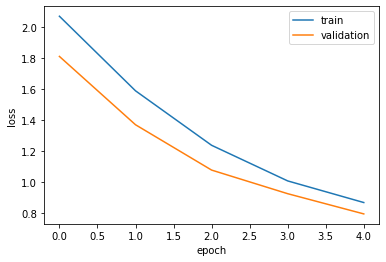

In [8]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train', 'validation'], loc='upper right')

## Spotify
If you pick a random dataset and try to analyze it using a neural network, there is a good chance you will start overfitting the data.

In [9]:
df[numeric_cols]

,Index,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,-1.731,-1.494,-0.164,12.535,-0.680,1.891,0.169,1.031,0.614,-0.664,-0.486,1.234,0.378,0.289,0.327
1,-1.729,-1.477,-0.469,12.124,-0.749,1.828,-0.695,0.808,0.345,-0.683,-0.841,-0.543,1.593,-1.191,-0.162
2,-1.727,-1.494,0.019,10.024,-0.507,1.828,-0.892,0.189,0.520,0.275,0.345,-0.669,1.491,-0.420,0.763
3,-1.725,-1.460,-0.347,9.324,4.114,1.764,0.829,1.631,1.051,-0.805,-0.806,1.269,0.109,0.702,0.336
4,-1.722,-1.425,-0.591,8.183,-0.554,1.638,0.323,0.436,-0.423,-0.563,-0.913,-0.910,0.919,0.298,1.669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1.720,1.844,-0.591,-0.506,0.747,0.563,0.506,0.412,0.131,-0.492,-0.983,-0.196,-0.228,0.241,0.411
1552,1.722,1.861,-0.591,-0.508,0.018,-0.259,-1.138,1.464,1.286,-0.349,-0.035,1.054,0.999,-0.340,0.877
1553,1.724,1.879,-0.591,-0.509,0.479,0.690,0.527,-0.684,0.803,-0.849,-0.259,-0.342,-0.603,0.411,-0.531
1554,1.726,1.896,-0.591,-0.513,-0.870,-0.638,0.997,-0.517,-0.270,-0.589,0.001,0.006,1.057,-0.958,1.612


Is the "rap" one of the genres?

In [11]:
df["is_rap"] = df["Genre"].map(lambda g_list: "rap" in g_list)

In [12]:
df["is_rap"].sum()

310

In [13]:
df["is_rap"].value_counts()

False    1235
True      310
Name: is_rap, dtype: int64

In [14]:
310/(1235+310)

0.20064724919093851

Nearly exactly 80% of the songs are not rap, so any model we train should at least have 80% accuracy, because otherwise we could do better simply by always predicting `False`.

We will use all the numeric columns as our inputs, and the `is_rap` column as our output.

In [15]:
X_train = df[numeric_cols]
y_train = df["is_rap"]

In [16]:
X_train.shape

(1545, 15)

In [17]:
y_train.shape

(1545,)

We make some changes to the model.  It is essential to change the input shape, because now each input data point is a length 15 vector.  We also now change the output layer, since there is only 1 value we are trying to output (True or False).  We also change the `loss` function to `"binary_crossentropy"`, which is a standard choice for classification models with only a True or False output.

In [18]:
model = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape = (15,)),
        keras.layers.Dense(16, activation="sigmoid"),
        keras.layers.Dense(16, activation="sigmoid"),
        keras.layers.Dense(1,activation="sigmoid")
    ]
)

model.compile(
    loss="binary_crossentropy", 
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"],
)

history = model.fit(X_train,y_train,epochs=100, validation_split = 0.2, verbose = False)

The following plot is very typical.  Initially (for about the first 5 epochs) the performances on the training set and the validation set are very similar.  But then the two plots diverge; that is where we probably start to overfit the training data.

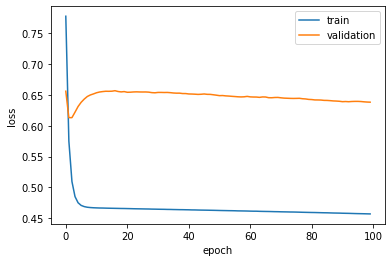

In [19]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train', 'validation'], loc='upper right')

We can also plot the accuracies.  You can see in the next plot that the accuracy on the validation set is worse than mere guessing of `False`.

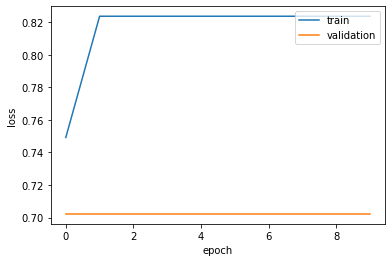

In [21]:
fig, ax = plt.subplots()
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train', 'validation'], loc='upper right')

This is a little different from what we did in class.  I make a huge neural network, like what we did in class, but I also increased the learning rate, and I changed some of the activation functions to `"relu"`, which is a very common choice.  This sort of huge neural network is almost guaranteed to badly overfit the data.

In [27]:
model = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape = (15,)),
        keras.layers.Dense(160, activation="relu"),
        keras.layers.Dense(160, activation="relu"),
        keras.layers.Dense(160, activation="relu"),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(1,activation="sigmoid")
    ]
)

model.compile(
    loss="binary_crossentropy", 
    optimizer=keras.optimizers.SGD(learning_rate=0.2),
    metrics=["accuracy"],
)

history = model.fit(X_train,y_train,epochs=100, validation_split = 0.2, verbose = False)

This neural network depends on over 50,000 weights and biases.

In [28]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 160)               2560      
_________________________________________________________________
dense_55 (Dense)             (None, 160)               25760     
_________________________________________________________________
dense_56 (Dense)             (None, 160)               25760     
_________________________________________________________________
dense_57 (Dense)             (None, 16)                2576      
_________________________________________________________________
dense_58 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_59 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_60 (Dense)             (None, 1)               

Here is a typical chart representing overfitting.  Again there is a brief moment where the validation loss score improves (i.e., decreases), but we rapidly start overfitting the data.  You can also see that the result is more chaotic on the validation set than on the training set.

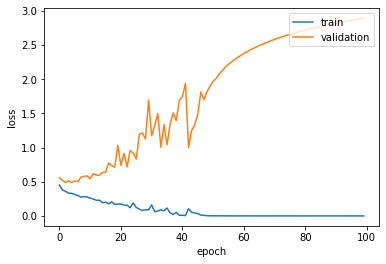

In [29]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train', 'validation'], loc='upper right')

A much smaller neural network like this next one is more likely to perform well.

In [31]:
model = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape = (15,)),
        keras.layers.Dense(3, activation="sigmoid"),
        keras.layers.Dense(1,activation="sigmoid")
    ]
)

model.compile(
    loss="binary_crossentropy", 
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"],
)

history = model.fit(X_train,y_train,epochs=100, validation_split = 0.2, verbose = False)

Although there is some overfitting (since the training loss is better than the validation loss), we see that the validation loss is improving even as we approach the 100th epoch, so ti might make sense to use more epochs.

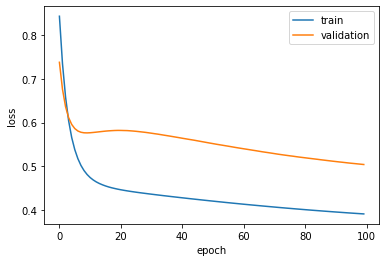

In [32]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train', 'validation'], loc='upper right')

(tf-regression)=
## Regression
We briefly show how to use neural networks for regression (so far, we have only used them for classification).  We will try to predict the value in the Energy column using the values of the other numeric columns.

In [34]:
X_train = df[numeric_cols].drop("Energy", axis=1)
y_train = df["Energy"]

It is important to switch to a loss function that is more well-suited to regression problems.  As a reminder, here are some of the things we can change in general when constructing a neural network.

* The structure of the network (how many layers, how many neurons)
* What activation function to use (can use a different one on each layer): [activations in Keras](https://keras.io/api/layers/activations/)
* What loss function to use: [losses in Keras](https://keras.io/api/losses/)
* What optimizer to use: [optimizers in Keras](https://keras.io/api/optimizers/)

We also get rid of the sigmoid activation function in the output layer.  (Sigmoid makes most sense when we are predicting a probability.)

In [35]:
model = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape = (14,)),
        keras.layers.Dense(100, activation="sigmoid"),
        keras.layers.Dense(100, activation="sigmoid"),
        keras.layers.Dense(1,activation="linear")
    ]
)

model.compile(
    loss="mean_squared_error", 
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    #metrics=["accuracy"],
)

history = model.fit(X_train,y_train,epochs=50, validation_split = 0.2, verbose=False)

I am a little surprised that even with such a large neural network, we do not seem to be overfitting the data, as demonstrated by the following plot.

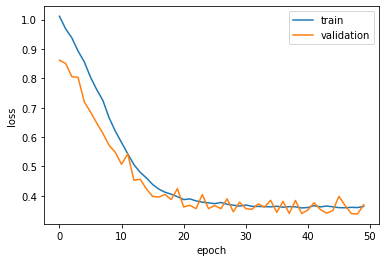

In [36]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train', 'validation'], loc='upper right')